<a href="https://colab.research.google.com/github/SanjnaGujral5/fl_based_intrusion_detection_system/blob/main/FL_IDS_UNSW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Network Intrusion Detection Basic Evaluation

**Total Features : 42 **

After Feature Selection : 15 (Top 15)

Model fitting Algorithm : Naive Bayes, KNN and Logistic Regression

In [2]:
# NIDS Basic Training (Train.csv, Test.csv)


import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
# np.set_printoptions(threshold=np.nan)
# np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [6]:
import os
print(os.listdir('/content'))


['.config', 'UNSW_NB15_training-set.csv', 'UNSW_NB15_testing-set.csv', 'sample_data']


In [9]:
train = pd.read_csv("/content/UNSW_NB15_training-set.csv")
test = pd.read_csv("/content/UNSW_NB15_testing-set.csv")


In [10]:
print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   id       dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
0   1  0.121478   tcp       -   FIN      6      4     258     172  74.087490   
1   2  0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
2   3  1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
3   4  1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   

   sttl  dttl         sload          dload  sloss  dloss      sinpkt  \
0   252   254  14158.942380    8495.365234      0      0   24.295600   
1    62   252   8395.112305  503571.312500      2     17   49.915000   
2    62   252   1572.271851   60929.230470      1      6  231.875571   
3    62   252   2740.178955    3358.622070      1      3  152.876547   

       dinpkt          sjit          djit  swin       stcpb       dtcpb  dwin  \
0    8.375000     30.177547     11.830604   255   621772692  2202533631   255   
1   15.432865     61.426934   1387.778330   255  1417884146  3077387971   25

In [11]:
train.drop(['id','attack_cat'], axis=1, inplace=True)
test.drop(['id','attack_cat'], axis=1, inplace=True)


In [12]:
train.columns


Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

In [13]:
train.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,175341.000000,175341.000000,175341.000000,1.753410e+05,1.753410e+05,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,1.753410e+05,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,1.753410e+05,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000,175341.000000
mean,1.359389,20.298664,18.969591,8.844844e+03,1.492892e+04,9.540619e+04,179.546997,79.609567,7.345403e+07,6.712056e+05,4.953000,6.948010,985.976864,88.216296,4.976254e+03,604.353826,116.257339,9.692504e+08,9.688770e+08,115.013625,0.041396,0.021020,0.020375,136.751769,124.173382,0.105982,2.144292e+03,9.306437,1.304179,6.193936,5.383538,4.206255,8.729881,0.014948,0.014948,0.133066,6.955789,9.100758,0.015752,0.680622
std,6.480249,136.887597,110.258271,1.747656e+05,1.436542e+05,1.654010e+05,102.940011,110.506863,1.883574e+08,2.421312e+06,66.005059,52.732999,7242.245841,987.093195,4.496585e+04,4061.043281,127.001024,1.355264e+09,1.354000e+09,126.886530,0.079354,0.043400,0.040506,204.677360,258.317056,0.776911,5.420797e+04,10.704331,0.954406,8.052476,8.047104,5.783585,10.956186,0.126048,0.126048,0.701208,8.321493,10.756952,0.124516,0.466237
min,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.278614e+01,62.000000,0.000000,1.305334e+04,0.000000e+00,0.000000,0.000000,0.008000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,57.000000,0.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.001582,2.000000,2.000000,4.300000e+02,1.640000e+02,3.225807e+03,254.000000,29.000000,8.796748e+05,1.447023e+03,0.000000,0.000000,0.279733,0.006000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,73.000000,44.000000,0.000000,0.000000e+00,5.000000,1.000000,2.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.668069,12.000000,10.000000,1.418000e+03,1.102000e+03,1.250000e+05,254.000000,252.000000,8.888889e+07,2.784487e+04,3.000000,2.000000,55.156896,51.053000,2.513295e+03,114.990625,255.000000,1.916651e+09,1.913675e+09,255.000000,0.065481,0.023268,0.038906,100.000000,89.000000,0.000000,0.000000e+00,12.000000,2.000000,7.000000,5.000000,3.000000,12.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,1.000000
max,59.999989,9616.000000,10974.000000,1.296523e+07,1.465555e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,4803.000000,5484.000000,84371.496000,56716.824000,1.460480e+06,289388.269700,255.000000,4.294959e+09,4.294882e+09,255.000000,2.518893,2.100352,1.520884,1504.000000,1458.000000,172.000000,6.558056e+06,63.000000,6.000000,51.000000,51.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [19]:
print(train.columns)
print(test.columns)


Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')
Index(['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src

In [20]:
# Target
train_y = train['label']
test_y = test['label']

# Features
train_x = train.drop(['label'], axis=1)
test_x = test.drop(['label'], axis=1)



In [21]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on train categorical columns
train_x[['proto','service','state']] = encoder.fit_transform(train_x[['proto','service','state']])

# Transform test using the same encoder
test_x[['proto','service','state']] = encoder.transform(test_x[['proto','service','state']])


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = train_x.select_dtypes(include=['float64','int64']).columns

train_x[num_cols] = scaler.fit_transform(train_x[num_cols])
test_x[num_cols] = scaler.transform(test_x[num_cols])


In [23]:
print(train_x.shape)
print(test_x.shape)
print(train_y.shape)
print(test_y.shape)


(175341, 42)
(82332, 42)
(175341,)
(82332,)


              feature  importance
9                sttl    0.176411
31       ct_state_ttl    0.125813
12              dload    0.061309
8                rate    0.056526
10               dttl    0.043693
11              sload    0.043112
24             synack    0.035632
40         ct_srv_dst    0.032648
6              sbytes    0.029293
27              dmean    0.029237
26              smean    0.028094
25             ackdat    0.027964
15             sinpkt    0.027068
16             dinpkt    0.026348
23             tcprtt    0.025272
7              dbytes    0.024392
0                 dur    0.021288
35     ct_dst_src_ltm    0.021009
5               dpkts    0.020747
30         ct_srv_src    0.020526
17               sjit    0.012662
3               state    0.011110
18               djit    0.010372
34   ct_dst_sport_ltm    0.008127
32         ct_dst_ltm    0.007639
39         ct_src_ltm    0.007628
20              stcpb    0.007457
13              sloss    0.007339
4             

<Figure size 1200x500 with 0 Axes>

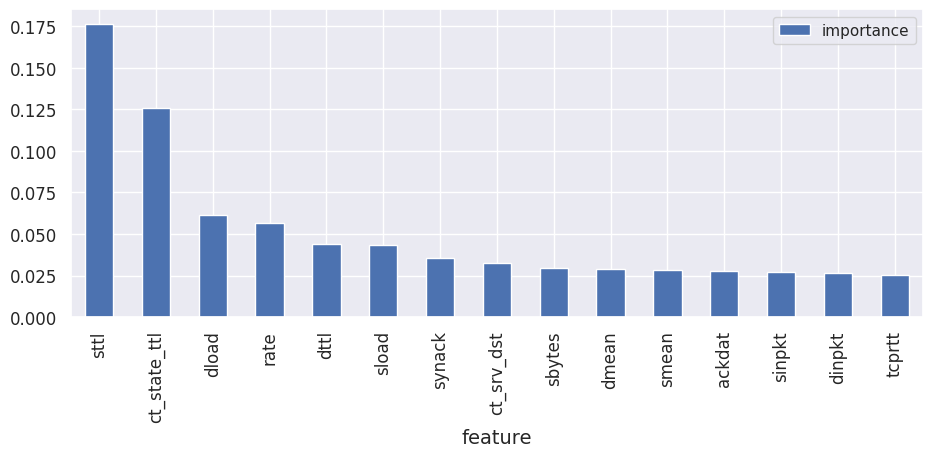

In [27]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rfc = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
rfc.fit(train_x, train_y)

# Get feature importances
importances = pd.DataFrame({
    'feature': train_x.columns,
    'importance': rfc.feature_importances_
}).sort_values(by='importance', ascending=False)

print(importances)

# Plot top 15 features
plt.figure(figsize=(12,5))
importances.head(15).set_index('feature').plot.bar()
plt.show()

# Select top 15 features for training
top_features = importances['feature'].head(15).tolist()
train_x_selected = train_x[top_features]
test_x_selected = test_x[top_features]



In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(train_x_selected, train_y, train_size=0.70, random_state=2)


In [33]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
# KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
# KNN_Classifier.fit(X_train, Y_train);
# print("knn classifier:",KNN_Classifier)
# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)

BernoulliNB()

In [34]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
# models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8413042397934098

Model Accuracy:
 0.8412960941191807

Confusion matrix:
 [[30480  8775]
 [10704 72779]]

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76     39255
           1       0.89      0.87      0.88     83483

    accuracy                           0.84    122738
   macro avg       0.82      0.82      0.82    122738
weighted avg       0.84      0.84      0.84    122738



============================== LogisticRegression Model Evaluation ==============================

Cross Validation Mean Score:
 0.9136941914872636

Model Accuracy:
 0.913767537355994

Confusion matrix:
 [[30178  9077]
 [ 1507 81976]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.77      0.85     39255
           1       0.90      0.98    

In [35]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()


============================== Naive Baye Classifier Model Test Results ==============================

Model Accuracy:
 0.8454460772199304

Confusion matrix:
 [[13121  3624]
 [ 4506 31352]]

Classification report:
               precision    recall  f1-score   support

           0       0.74      0.78      0.76     16745
           1       0.90      0.87      0.89     35858

    accuracy                           0.85     52603
   macro avg       0.82      0.83      0.82     52603
weighted avg       0.85      0.85      0.85     52603



============================== LogisticRegression Model Test Results ==============================

Model Accuracy:
 0.9170769727962284

Confusion matrix:
 [[12983  3762]
 [  600 35258]]

Classification report:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86     16745
           1       0.90      0.98      0.94     35858

    accuracy                           0.92     52603
   macro avg       0.93